In [9]:
import numpy as np
from numpy.linalg import norm, qr, svd
import matplotlib.pyplot as plt

In [11]:
def gram_shmidt(A):
    n = A.shape[0]
    u = np.zeros((n,n))
    u[:, 0] = A[:, 0] / norm(A[:, 0])
    for i in range(1, n):
        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (u[:, j] @ A[:, i])*u[:, j]
        u[:, i] = u[:, i] / norm(u[:, i])
    R = np.zeros((n,n))
    for i in range(n):
        R[i, i:] = u[:, i] @ A[:, i:]
    return u, R

In [12]:
A = np.random.random((3,3))
Q, R = gram_shmidt(A)
print(A, "\n", Q@R, np.allclose(Q@R, A))

[[0.1986547  0.05162231 0.33701635]
 [0.23263684 0.74929226 0.2443126 ]
 [0.11656982 0.68661726 0.25647932]] 
 [[0.1986547  0.05162231 0.33701635]
 [0.23263684 0.74929226 0.2443126 ]
 [0.11656982 0.68661726 0.25647932]] True


In [13]:
for n in [10, 40, 100, 200]:
    A = np.random.random((n,n))
    Q, R = gram_shmidt(A)
    Q_lib, R_lib = qr(A)
    assert np.allclose(Q@R, A)
    print(np.allclose(abs(Q), abs(Q_lib)), np.allclose(abs(R), abs(R_lib)))

True True
True True
True True
True True


In [14]:
U, S, VH = svd(A)

In [15]:
S.shape

(200,)

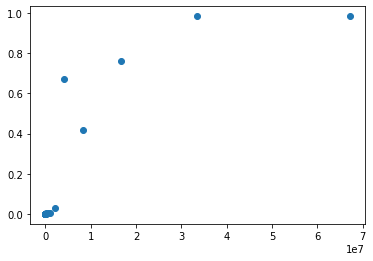

In [25]:
X = [2 ** i for i in range(40)]
Y = []

for cond in X:
    A = np.random.rand(8, 8)
    U, S, VH = np.linalg.svd(A)
    S[0] *= cond
    A = (U * S) @ VH
    Q, R = gram_shmidt(A)
    
    Y.append(np.max(np.abs(np.identity(8) - Q.T @ Q)))
            
n = 27
plt.scatter(X[:n], Y[:n])

Wielkość rozbieżności silnie zależy od wskaźnika uwarunkowania. Przy wysokim wskaźniku uwarunkowania wyniki stają się bezużyteczne. Głównym powodem jest niedokładność obliczeniowa (zaokrąglenia).

# Zad 2

In [26]:
from scipy.linalg import solve_triangular

In [28]:
X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
Y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4])

In [40]:
def solve(A, Y):
    Y = A.T @ Y
    A = A.T @ A
    
    Q, R = gram_shmidt(A)
    Y = Q.T @ Y
    return solve_triangular(R, Y)

A = np.ones((X.shape[0], 3))
A[:, 1] = X[:]
A[:, 2] = X ** 2

res = solve(A, Y)

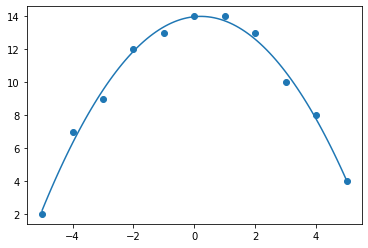

In [43]:
x = np.linspace(-5, 5, 100)
y = res[0] + res[1] * x + res[2] * x**2
plt.scatter(X, Y)
plt.plot(x, y)